In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from pyfolio.timeseries import perf_stats
import sys
sys.path.append('/home/tomek/ib_tools')
from blotter import MongoBlotter
%matplotlib inline

In [2]:
cash = 76619+1696
df = MongoBlotter(collection='live_blotter').read()
df.tail(20)

,_id,sys_time,time,contract,action,amount,price,exec_ids,order_id,perm_id,reason,commission,realizedPNL
498,5f63244d0be6a1ea04070561,2020-09-17 10:54:37.351,2020-09-17 08:54:37.349,NQZ0,BUY,3.0,11116.833333,"[00019125.5f62b6d5.01.01, 00019125.5f62b6d6.01...",0,1934820269,MANUAL TRADE,6.3,0.0
499,5f6326b30be6a1ea0407056a,2020-09-17 11:04:51.457,2020-09-17 09:04:51.456,NQZ0,SELL,3.0,11109.833333,"[00019125.5f62b760.01.01, 00019125.5f62b761.01...",0,1934820271,MANUAL TRADE,6.3,-432.6
500,5f6326b30be6a1ea0407056b,2020-09-17 11:04:51.458,2020-09-17 09:04:51.456,NQZ0,SELL,3.0,11109.833333,"[00019125.5f62b760.01.01, 00019125.5f62b761.01...",0,1934820271,MANUAL TRADE,6.3,-432.6
501,5f6326cf0be6a1ea0407056c,2020-09-17 11:05:19.773,2020-09-17 09:05:19.772,NQZ0,SELL,3.0,11111.750000,[00019125.5f62b76d.01.01],0,1934820272,MANUAL TRADE,6.3,0.0
502,5f632a620be6a1ea0407057d,2020-09-17 11:20:34.658,2020-09-17 09:20:34.613,NQZ0,BUY,3.0,11128.166667,"[00019125.5f62b853.01.01, 00019125.5f62b854.01...",0,1934820274,MANUAL TRADE,6.3,-997.6
503,5f632a620be6a1ea0407057e,2020-09-17 11:20:34.658,2020-09-17 09:20:34.613,NQZ0,BUY,3.0,11128.166667,"[00019125.5f62b853.01.01, 00019125.5f62b854.01...",0,1934820274,MANUAL TRADE,6.3,-997.6
504,5f632cb50be6a1ea04070587,2020-09-17 11:30:29.796,2020-09-17 09:30:29.795,NQZ0,BUY,3.0,11128.916667,"[00019125.5f62b942.01.01, 00019125.5f62b943.01...",0,1934820278,MANUAL TRADE,6.3,0.0
505,5f632ce50be6a1ea04070588,2020-09-17 11:31:17.958,2020-09-17 09:31:17.915,NQZ0,SELL,3.0,11130.833333,"[00019125.5f62b94d.01.01, 00019125.5f62b94e.01...",0,1934820279,MANUAL TRADE,6.3,102.4
506,5f632ce50be6a1ea04070589,2020-09-17 11:31:17.959,2020-09-17 09:31:17.915,NQZ0,SELL,3.0,11130.833333,"[00019125.5f62b94d.01.01, 00019125.5f62b94e.01...",0,1934820279,MANUAL TRADE,6.3,102.4
507,5f6331250be6a1ea04070592,2020-09-17 11:49:25.186,2020-09-17 09:49:25.183,NQZ0,SELL,1.0,11163.750000,[00019125.5f62bb2e.01.01],0,1934820282,MANUAL TRADE,2.1,0.0


In [3]:
#del df['sys_time']
del df['exec_ids']
del df['perm_id']
del df['_id']
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df['cash'] = df.realizedPNL.cumsum() + cash
df['contract'] = df['contract'].apply(lambda x: x[:-2])
micro_contracts = df[df.contract.str.startswith('M')]
macro_contracts = df[~df.contract.str.startswith('M')]
micro_contracts['amount'] /= 10
df = pd.concat([macro_contracts, micro_contracts]).sort_index()
df.contract = df.contract.str.strip('M')
df['contract'] = df['contract'].apply(lambda x: x[:2])
df.contract = df.contract.str.strip()

In [4]:
df.tail(40)

,sys_time,contract,action,amount,price,order_id,reason,commission,realizedPNL,cash
time,,,,,,,,,,
2020-09-16 22:13:15.345,2020-09-17 00:13:15.356,NQ,BUY,0.8,11289.093750,59,STOP-LOSS,3.76,-647.020000,45777.819998
2020-09-17 00:33:32.803,2020-09-17 02:33:32.806,NQ,SELL,0.8,11173.968750,114,ENTRY,3.76,0.000000,45777.819998
2020-09-17 01:33:11.797,2020-09-17 03:33:11.803,NQ,BUY,0.8,11219.718750,115,STOP-LOSS,3.76,-739.520000,45038.299998
2020-09-17 01:52:33.268,2020-09-17 03:52:33.358,NQ,SELL,0.8,11175.687500,116,ENTRY,3.76,0.000000,45038.299998
2020-09-17 03:52:10.327,2020-09-17 05:52:10.332,NQ,BUY,0.8,11116.968750,117,STOP-LOSS,3.76,931.980000,45970.279998
2020-09-17 06:35:37.618,2020-09-17 08:35:37.674,NQ,SELL,0.8,11026.906250,78,ENTRY,3.76,0.000000,45970.279998
2020-09-17 07:01:27.065,2020-09-17 09:01:27.066,NQ,SELL,1.0,11038.500000,0,MANUAL TRADE,2.10,0.000000,45970.279998
2020-09-17 07:02:34.032,2020-09-17 09:02:34.033,NQ,SELL,1.0,11045.000000,0,MANUAL TRADE,2.10,0.000000,45970.279998
2020-09-17 07:06:17.429,2020-09-17 09:06:17.528,NQ,BUY,0.8,11056.000000,79,STOP-LOSS,3.76,-473.020000,45497.259998


In [5]:
c = set(df['contract'])
#allocs = pd.Series([1/len(c)]*len(c) +[1], index=list(c) + ['total'])
allocs = pd.Series([.4, .125, .225, .25, 1], index=['NQ', 'ES', 'GC', 'YM', 'total'])

In [6]:
allocs

NQ       0.400
ES       0.125
GC       0.225
YM       0.250
total    1.000
dtype: float64

In [7]:
df.groupby('contract').realizedPNL.sum()

contract
ES    -3142.900000
GC    -7140.220002
NQ   -30853.959997
YM     -510.680000
Name: realizedPNL, dtype: float64

In [8]:
df.realizedPNL.sum()

-41647.759999

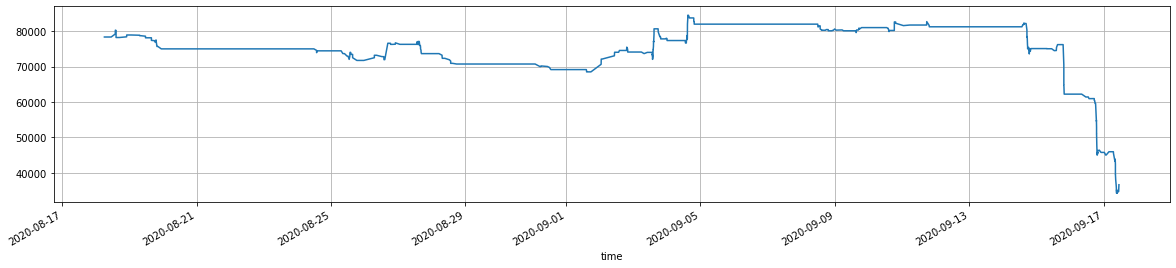

In [9]:
df.cash.plot(figsize=(20,4), grid=True);

In [10]:
by_contract = pd.pivot_table(df, values='realizedPNL', index=df.index, columns=['contract'])
by_contract['total'] = by_contract.sum(axis=1)

In [11]:
# number of trades
trades = df.groupby('contract').action.count()
trades, trades.sum()

(contract
 ES     37
 GC     59
 NQ    368
 YM     54
 Name: action, dtype: int64,
 518)

In [12]:
# trades per day
days = len(by_contract.resample('B').count().index)
trades/days, trades.sum()/days

(contract
 ES     1.608696
 GC     2.565217
 NQ    16.000000
 YM     2.347826
 Name: action, dtype: float64,
 22.52173913043478)

In [13]:
# commission paid
df.groupby('contract').commission.sum()

contract
ES      79.31
GC     167.80
NQ    1061.89
YM     127.89
Name: commission, dtype: float64

In [14]:
df.commission.sum()

1436.89

In [15]:
# per trade stats (pro rated per macro contract)
exits = df[df.realizedPNL!=0]
dfs = {}
for contract in exits.contract.unique():
    dfs[contract] = exits[exits.contract == contract]
dfs['total'] = exits
results = pd.DataFrame(columns=['success_rate', 'average_PNL', 'average_gain', 'average_loss', 
                                'win_ratio', 'EV/contract', 'number_of_contracts'])
for c, d in dfs.items():
    row = pd.Series()
    row['success_rate'] = round((d[d.realizedPNL > 0]).realizedPNL.count() / d.realizedPNL.count(), 2)
    d['pnl_per_contract'] = d.realizedPNL / d.amount
    row['average_PNL'] = round(d['pnl_per_contract'].mean(), 2)
    row['average_gain'] = round((d[d.realizedPNL > 0])['pnl_per_contract'].mean(), 2)
    row['average_loss'] = round((d[d.realizedPNL < 0])['pnl_per_contract'].mean(), 2)
    row['win_ratio'] = round(abs(row['average_gain'] / row['average_loss']), 2)
    row['EV/contract'] = round((row['average_gain'] * row['success_rate']) + (
        row['average_loss'] * (1 - row['success_rate'])), 2)
    row['number_of_contracts'] = d.amount.sum()
    results.loc[c] = row
results

,success_rate,average_PNL,average_gain,average_loss,win_ratio,EV/contract,number_of_contracts
NQ,0.47,-4.72,584.50,-522.71,1.12,-2.32,224.4
GC,0.27,-243.86,629.53,-561.45,1.12,-239.89,24.9
ES,0.39,-119.01,1151.91,-927.77,1.24,-116.69,10.5
YM,0.37,19.57,859.62,-474.57,1.81,19.08,21.7
total,0.43,-39.58,651.96,-554.55,1.18,-35.75,281.5


In [16]:
daily = by_contract.resample('B').sum()
daily = daily /  (allocs * cash)
#daily[['CL', 'ES', 'GC', 'NQ']].plot(figsize=(20,8), grid=True);

In [17]:
# instrument correlations
log_returns = np.log(daily + 1)
log_returns.corr()

,ES,GC,NQ,YM,total
ES,1.000000,-0.158624,-0.078869,0.211855,0.093099
GC,-0.158624,1.000000,0.127802,-0.535715,0.176457
NQ,-0.078869,0.127802,1.000000,0.024776,0.960927
YM,0.211855,-0.535715,0.024776,1.000000,0.175118
total,0.093099,0.176457,0.960927,0.175118,1.000000


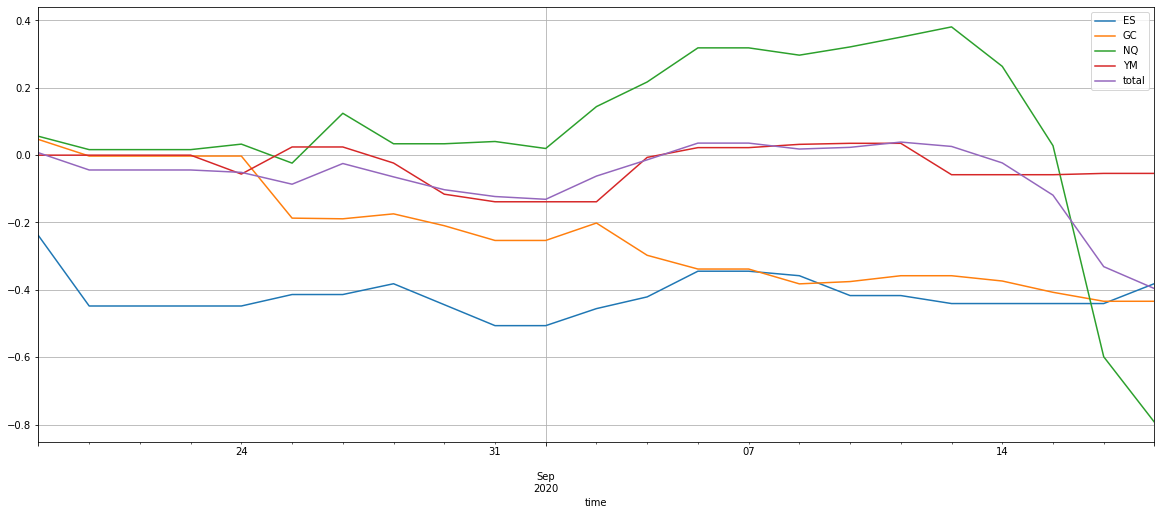

In [18]:
log_returns.cumsum().plot(figsize=(20,8), grid=True);

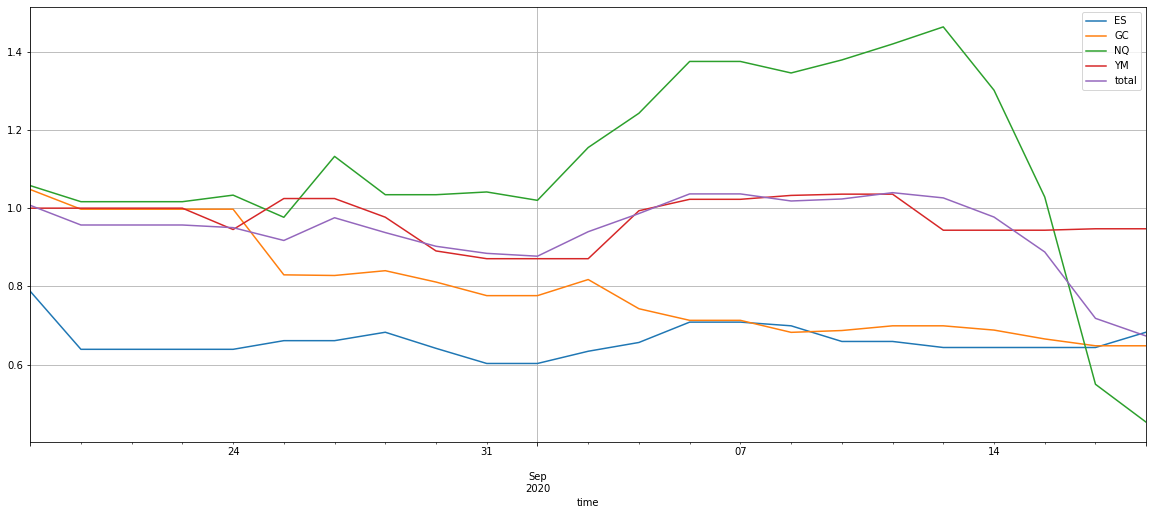

In [19]:
returns = daily.copy()
returns_index = (returns + 1).cumprod()
returns_index.plot(figsize=(20,8), grid=True);

In [20]:
stats = pd.DataFrame()
for col in daily.columns:
    stats[col] = perf_stats(daily[col])
stats

,ES,GC,NQ,YM,total
Annual return,-0.984704,-0.991390,-0.999832,-0.447670,-0.986983
Cumulative returns,-0.317180,-0.352069,-0.547620,-0.052737,-0.327162
Annual volatility,1.090327,0.726329,2.060510,0.750901,0.880743
Sharpe ratio,-3.226203,-6.112563,-2.896326,-0.437584,-4.437106
Calmar ratio,-2.478445,-2.598036,-1.447075,-2.980423,-2.797566
Stability,0.004171,0.909402,0.015006,0.011376,0.099093
Max drawdown,-0.397307,-0.381592,-0.690933,-0.150203,-0.352801
Omega ratio,0.478708,0.256733,0.540465,0.900349,0.424626
Sortino ratio,-3.502680,-6.152461,-3.200515,-0.678672,-4.870037
Skew,-1.658559,-1.525051,-1.766090,0.849346,-1.169593


In [21]:
# monthly returns in percent
monthly_log_returns = log_returns.resample('M').sum()
monthly_returns = np.exp(monthly_log_returns)-1
round(monthly_returns, 4) * 100

,ES,GC,NQ,YM,total
time,,,,,
2020-08-31,-39.73,-22.38,4.14,-12.93,-11.56
2020-09-30,13.29,-16.53,-56.56,8.79,-23.92


In [22]:
# total returns by contract in percent
round(np.exp(monthly_log_returns.sum())-1, 2)* 100

ES      -32.0
GC      -35.0
NQ      -55.0
YM       -5.0
total   -33.0
dtype: float64

In [23]:
df.sort_values('realizedPNL', ascending=False)[['contract', 'action', 'price', 'realizedPNL']]

,contract,action,price,realizedPNL
time,,,,
2020-08-26 16:38:55.001,NQ,SELL,11920.750000,4631.600000
2020-09-10 18:32:51.656,NQ,BUY,11196.500000,2405.800000
2020-09-02 01:02:04.400,NQ,SELL,12384.750000,2135.800000
2020-09-04 14:43:33.678,NQ,BUY,11168.750000,2095.800000
2020-09-04 14:38:48.345,NQ,BUY,11283.750000,1980.800000
...,...,...,...,...
2020-09-15 19:53:05.598,NQ,BUY,11403.000000,-2587.600000
2020-09-16 19:10:42.128,NQ,SELL,11311.333333,-3327.600000
2020-09-16 18:54:03.263,NQ,SELL,11337.750000,-4987.599999


In [24]:
daily.sort_values('total', ascending=False)

,ES,GC,NQ,YM,total
time,,,,,
2020-09-02,0.051873,0.053071,0.132501,0.000000,0.071426
2020-08-26,0.000000,-0.001977,0.159519,0.000000,0.063363
2020-09-04,0.079294,-0.039979,0.106630,0.029418,0.050923
2020-09-03,0.035432,-0.091351,0.075863,0.140901,0.049445
2020-09-10,0.000000,0.017510,0.029568,0.000000,0.015767
2020-08-18,-0.212536,0.047740,0.057682,0.000000,0.007248
2020-09-09,-0.057270,0.006850,0.024754,0.003093,0.005057
2020-09-07,0.000000,0.000000,0.000000,0.000000,0.000000
2020-08-20,0.000000,0.000000,0.000000,0.000000,0.000000
